In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
df  = pd.read_csv("email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

# Fit and transform the Message column
X_tfidf = vectorizer.fit_transform(df['Message'])


print(X_tfidf.shape)

(5573, 8711)


In [4]:
y = df['Category']
x_train, x_test, y_train, y_test=train_test_split(X_tfidf,y,test_size=20,random_state=40)

In [6]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
pred = model.predict(x_test)
print(confusion_matrix(y_test, pred))
print("Accuracy: ", accuracy_score(y_test, pred))

[[15  0]
 [ 0  5]]
Accuracy:  1.0


In [13]:
from sklearn.metrics import classification_report

report3 = classification_report(y_test, pred)
print("Classification Report for MNB \n", report3)

Classification Report for MNB 
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00        15
        spam       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



[[15  0]
 [ 0  5]]


<Axes: >

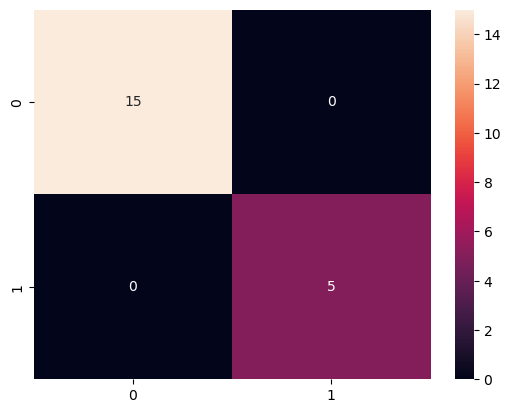

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)